In [1]:
# Core analysis packages
import numpy as np
import os, sys
import pandas as pd
from scipy import stats
from scipy.special import comb
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import anova
import bff
import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
plt.rcdefaults()
import seaborn as sns 
sns.set(style="ticks", color_codes=True)
sns.set_style("white")
sns.set_style({'xtick.bottom': True, 'ytick.left': True})
colorref = ["gray", "royalblue", "crimson", "goldenrod", "mediumorchid", "seagreen"]

# iPython magic commands
%matplotlib notebook
%load_ext autoreload
%autoreload 2
%autosave 30

SMALL_SIZE = 12
MEDIUM_SIZE = 12
BIG_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIG_SIZE)  # fontsize of the figure title
cust_palette = sns.color_palette("Paired")[6:10]
cust_palette = [cust_palette[i] for i in [1,0,3,2]]

def median_split(S):
    return S > S.median()

Autosaving every 30 seconds


In [35]:
df = pd.read_excel("data63.xlsx")
df

,ResponseId,Country,cond,condName,Intervention_order,Belief1,Belief2,Belief3,Belief4,Policy1,...,Edu,Income,Indirect_SES,MacArthur_SES,PerceivedSciConsensu_1,Intro_Timer,condition_time_total,WEPTcc,BELIEFcc,POLICYcc
0,R_1r7Yr7R1xMimIvj,Usa,5,CollectAction,BeliefinAnthrCC|SocialmediasharingPipedText|Po...,98.0,77.0,86.0,93.0,71.0,...,3.0,5.0,"2,4,5",7.0,80.0,6.056,95.501,1,88.50,89.000000
1,R_2ATgV5VxewrTRiI,Usa,1,Control,PolicySupport|BeliefinAnthrCC|Socialmediashari...,49.0,50.0,51.0,51.0,1.0,...,3.0,4.0,"1,2,3,4,5,6,7",5.0,51.0,16.284,200.742,0,50.25,66.222222
2,R_3ENlePBlLyYjExr,Usa,9,LetterFutureGen,SocialmediasharingPipedText|PolicySupport|Beli...,87.0,82.0,84.0,83.0,84.0,...,3.0,5.0,"1,2,3,6,7",8.0,73.0,5.701,218.442,1,84.00,84.222222
3,R_2c0HQgvYzas6mus,Usa,4,SciConsens,PolicySupport|SocialmediasharingPipedText|Beli...,1.0,1.0,0.0,0.0,1.0,...,3.0,5.0,"1,2,3,4,5,6,7",4.0,1.0,13.282,12.702,0,0.50,1.222222
4,R_00siryCwgdMus6J,Usa,8,PluralIgnorance,BeliefinAnthrCC|SocialmediasharingPipedText|Po...,56.0,59.0,61.0,54.0,79.0,...,3.0,5.0,"1,3,5,6,7",7.0,65.0,8.474,19.315,0,57.50,80.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59435,R_2TuXye2HP6EO5KZ,Vietnam,11,FutureSelfCont,PolicySupport|SocialmediasharingPipedText|Beli...,49.0,100.0,100.0,74.0,70.0,...,3.0,2.0,"1,2,3,4,5,6,7",7.0,60.0,27.732,873.538,0,80.75,82.500000
59436,R_3R3p8C0gzLKTcCu,Vietnam,12,BindingMoral,BeliefinAnthrCC|SocialmediasharingPipedText|Po...,94.0,98.0,98.0,96.0,92.0,...,3.0,2.0,"1,2,4,6,7",3.0,74.0,49.502,0.000,0,96.50,86.444444
59437,R_OeT1JV3yC1aJ4EF,Vietnam,8,PluralIgnorance,SocialmediasharingPipedText|PolicySupport|Beli...,100.0,100.0,100.0,100.0,80.0,...,3.0,1.0,"2,4,5,6,7",6.0,100.0,7.920,89.072,7,100.00,83.333333
59438,R_2azVf0KXD3rtly8,Vietnam,3,NegativeEmotions,SocialmediasharingPipedText|BeliefinAnthrCC|Po...,79.0,51.0,78.0,51.0,0.0,...,3.0,NaN,"1,2,3,4,5,6,7",7.0,100.0,40.222,398.193,8,64.75,66.666667


In [45]:
df.Country.unique()

array(['Algeria', 'Armenia', 'Australia', 'Austria', 'Belgium', 'Brazil',
       'Bulgaria', 'Canada', 'Chile', 'China', 'Czechia', 'Denmark',
       'Ecuador', 'Finland', 'France', 'Gambia', 'Germany', 'Ghana',
       'Greece', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kenya',
       'Latvia', 'Mexico', 'Morocco', 'Netherlands', 'Newzealand',
       'Nigeria', 'Northmacedonia', 'Norway', 'Peru', 'Philippines',
       'Poland', 'Portugal', 'Romania', 'Russia', 'Saudiarabia', 'Serbia',
       'Singapore', 'Slovakia', 'Slovenia', 'Southafrica', 'Southkorea',
       'Spain', 'Srilanka', 'Sudan', 'Sweden', 'Switzerland', 'Taiwan',
       'Tanzania', 'Thailand', 'Turkey', 'Uganda', 'Uk', 'Ukraine',
       'Unitedarabemirates', 'Uruguay', 'Usa', 'Venezuela', 'Vietnam'],
      dtype=object)

In [36]:
samplesize = df.loc[:, ["ResponseId", "Country"]].groupby("Country").count().reset_index().rename(columns={"ResponseId": "N", "Country": "name"})
samplesize

,name,N
0,Algeria,528
1,Armenia,492
2,Australia,979
3,Austria,502
4,Belgium,522
...,...,...
58,Unitedarabemirates,554
59,Uruguay,497
60,Usa,8253
61,Venezuela,110


In [37]:
df['ide'] = (df['Politics2_1'] + df['Politics2_9'])/2
df

,ResponseId,Country,cond,condName,Intervention_order,Belief1,Belief2,Belief3,Belief4,Policy1,...,Income,Indirect_SES,MacArthur_SES,PerceivedSciConsensu_1,Intro_Timer,condition_time_total,WEPTcc,BELIEFcc,POLICYcc,ide
0,R_1r7Yr7R1xMimIvj,Usa,5,CollectAction,BeliefinAnthrCC|SocialmediasharingPipedText|Po...,98.0,77.0,86.0,93.0,71.0,...,5.0,"2,4,5",7.0,80.0,6.056,95.501,1,88.50,89.000000,93.0
1,R_2ATgV5VxewrTRiI,Usa,1,Control,PolicySupport|BeliefinAnthrCC|Socialmediashari...,49.0,50.0,51.0,51.0,1.0,...,4.0,"1,2,3,4,5,6,7",5.0,51.0,16.284,200.742,0,50.25,66.222222,79.5
2,R_3ENlePBlLyYjExr,Usa,9,LetterFutureGen,SocialmediasharingPipedText|PolicySupport|Beli...,87.0,82.0,84.0,83.0,84.0,...,5.0,"1,2,3,6,7",8.0,73.0,5.701,218.442,1,84.00,84.222222,26.5
3,R_2c0HQgvYzas6mus,Usa,4,SciConsens,PolicySupport|SocialmediasharingPipedText|Beli...,1.0,1.0,0.0,0.0,1.0,...,5.0,"1,2,3,4,5,6,7",4.0,1.0,13.282,12.702,0,0.50,1.222222,100.0
4,R_00siryCwgdMus6J,Usa,8,PluralIgnorance,BeliefinAnthrCC|SocialmediasharingPipedText|Po...,56.0,59.0,61.0,54.0,79.0,...,5.0,"1,3,5,6,7",7.0,65.0,8.474,19.315,0,57.50,80.222222,48.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59435,R_2TuXye2HP6EO5KZ,Vietnam,11,FutureSelfCont,PolicySupport|SocialmediasharingPipedText|Beli...,49.0,100.0,100.0,74.0,70.0,...,2.0,"1,2,3,4,5,6,7",7.0,60.0,27.732,873.538,0,80.75,82.500000,38.5
59436,R_3R3p8C0gzLKTcCu,Vietnam,12,BindingMoral,BeliefinAnthrCC|SocialmediasharingPipedText|Po...,94.0,98.0,98.0,96.0,92.0,...,2.0,"1,2,4,6,7",3.0,74.0,49.502,0.000,0,96.50,86.444444,81.0
59437,R_OeT1JV3yC1aJ4EF,Vietnam,8,PluralIgnorance,SocialmediasharingPipedText|PolicySupport|Beli...,100.0,100.0,100.0,100.0,80.0,...,1.0,"2,4,5,6,7",6.0,100.0,7.920,89.072,7,100.00,83.333333,41.0
59438,R_2azVf0KXD3rtly8,Vietnam,3,NegativeEmotions,SocialmediasharingPipedText|BeliefinAnthrCC|Po...,79.0,51.0,78.0,51.0,0.0,...,NaN,"1,2,3,4,5,6,7",7.0,100.0,40.222,398.193,8,64.75,66.666667,50.0


In [69]:
# Global median split
# df["Ideology"] = (df["Politics2_1"] > df["Politics2_1"].median()).astype(int)

# Per-country median split
new = []
for _, sub in df.groupby("Country"):
    sub.loc[:, "Ideology"] = (sub.loc[:, "ide"] > sub.loc[:, "ide"].median()).astype(float)
    # Ensure NaN ideology when Politics2_1 is NaN
    sub.loc[sub.Politics2_1.isna(), "Ideology"] = np.NaN
    new.append(sub)
df = pd.concat(new)
# Replace 1 with "Conservative" and 0 with "Liberal"
df['Ideology'] = df['Ideology'].replace(1, 'Conservative').replace(0, 'Liberal')

/tmp/ipykernel_69115/962624056.py:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sub.loc[:, "Ideology"] = (sub.loc[:, "ide"] > sub.loc[:, "ide"].median()).astype(float)


In [71]:
#transform the datafram from wide format to long format

df_z = pd.melt(
    df.loc[:, ['ResponseId', "Country", "condName", "cond", "Ideology","ide", "BELIEFcc", "WEPTcc"]],
    id_vars=['ResponseId', "Country", "condName",  "Ideology","ide", "cond"],
    var_name="Type",
    value_name="score"
)

df_z_control=df_z.query('cond==1')
df_control = df.query('cond==1')

# Figure 1

<IPython.core.display.Javascript object>


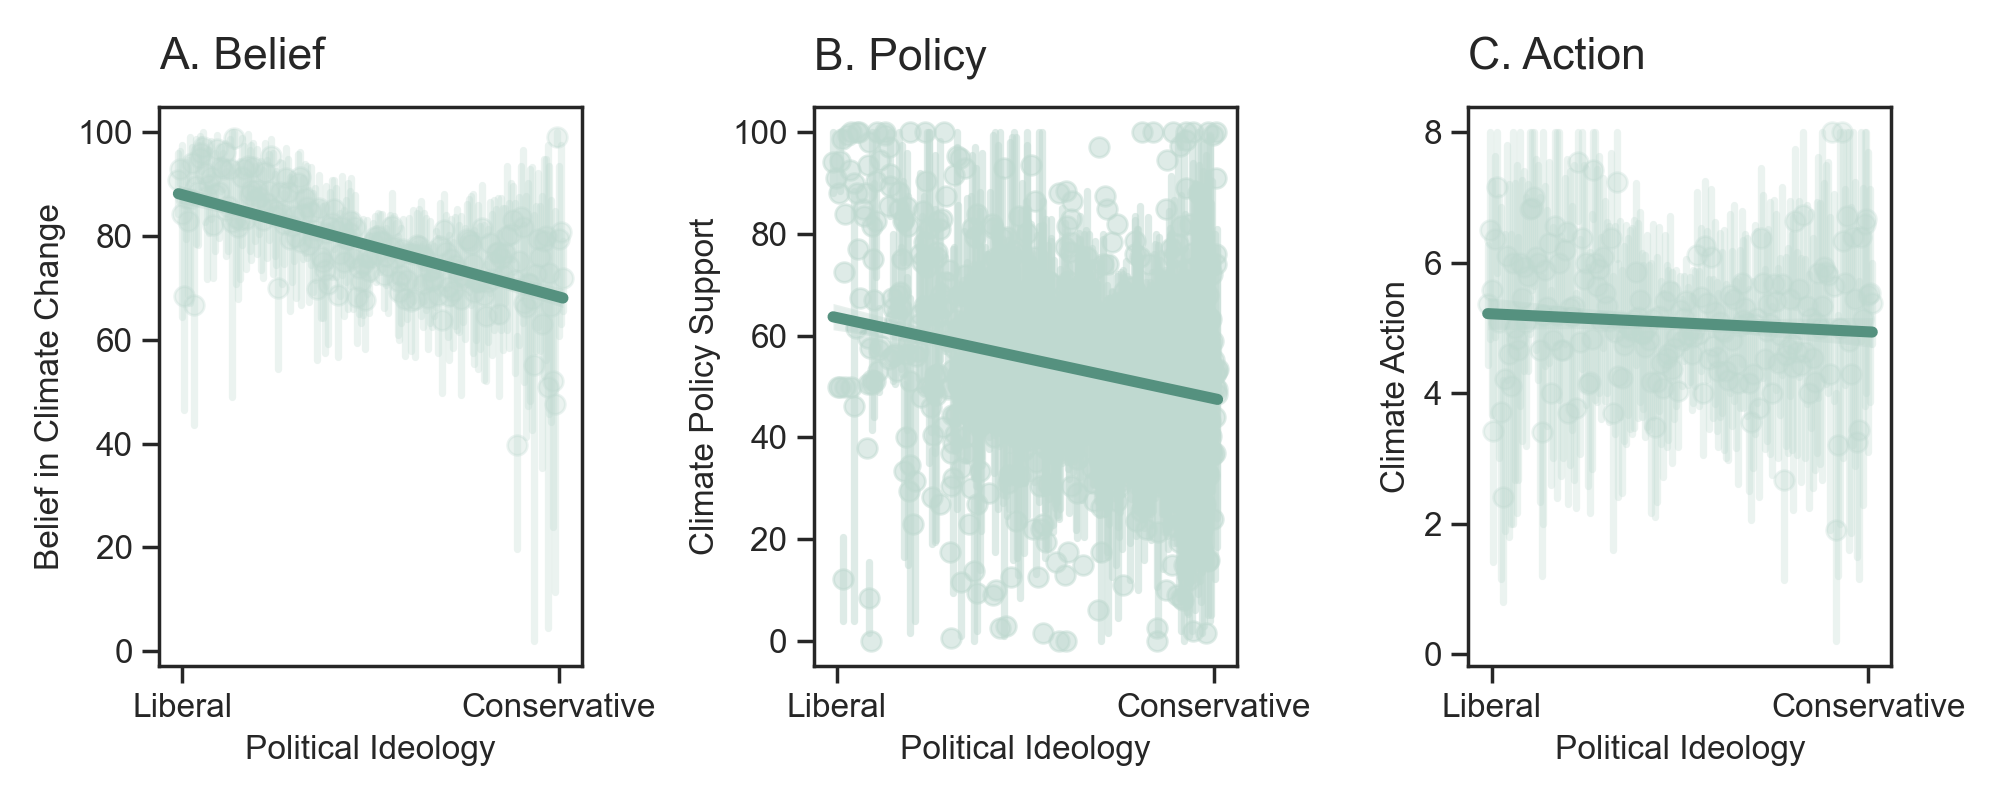

In [22]:
fig, ax = plt.subplots(1,3, figsize=(10,4))

sns.regplot(y=df_control.BELIEFcc, x=df_control.ide, scatter_kws={"color": "#BFD9D0","alpha":.3}, \
            line_kws={"color":"#55917F","alpha":1,"lw":4},x_estimator=np.mean, ax=ax[0])
sns.regplot(x=df_control.POLICYcc, y=df_control.ide, scatter_kws={"color": "#BFD9D0","alpha":.5}, \
            line_kws={"color":"#55917F", "linewidth": 4}, x_estimator=np.mean, ax=ax[1])
sns.regplot(y=df_control.WEPTcc, x=df_control.ide, scatter_kws={"color": "#BFD9D0","alpha":.3}, \
            line_kws={"color":"#55917F","alpha":1,"lw":4} ,x_estimator=np.mean, ax=ax[2])

ax[0].set_ylabel('Belief in Climate Change')
ax[0].set_xticks([1, 99])
ax[0].set_xticklabels(['Liberal', 'Conservative'])
ax[0].set_xlabel('Political Ideology')

ax[2].set_xticks([1, 99])
ax[2].set_xticklabels(['Liberal', 'Conservative'])
ax[2].set_ylabel('Climate Action')
ax[2].set_xlabel('Political Ideology')

ax[1].set_xlabel('Political Ideology')
# ax[1].set_ylim([-1.01,1])
ax[1].set_ylabel('Climate Policy Support')
ax[1].set_xticks([1, 99])
ax[1].set_xticklabels(['Liberal', 'Conservative'])

bff.panellabel(ax[0], "A. Belief")
bff.panellabel(ax[1], "B. Policy")
bff.panellabel(ax[2], "C. Action")
plt.tight_layout()
plt.savefig('Fig1.pdf', dpi=500, format="pdf")

# Figure 2

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['BELIEFcc', 'WEPTcc']] = scaler.fit_transform(df[['BELIEFcc', 'WEPTcc']])

df_z = pd.melt(
    df.loc[:, ['ResponseId', "Country", "condName", "cond", "Ideology","ide", "BELIEFcc", "WEPTcc"]],
    id_vars=['ResponseId', "Country", "condName",  "Ideology","ide", "cond"],
    var_name="Type",
    value_name="score"
)

df_z_control=df_z.query('cond==1')

<IPython.core.display.Javascript object>


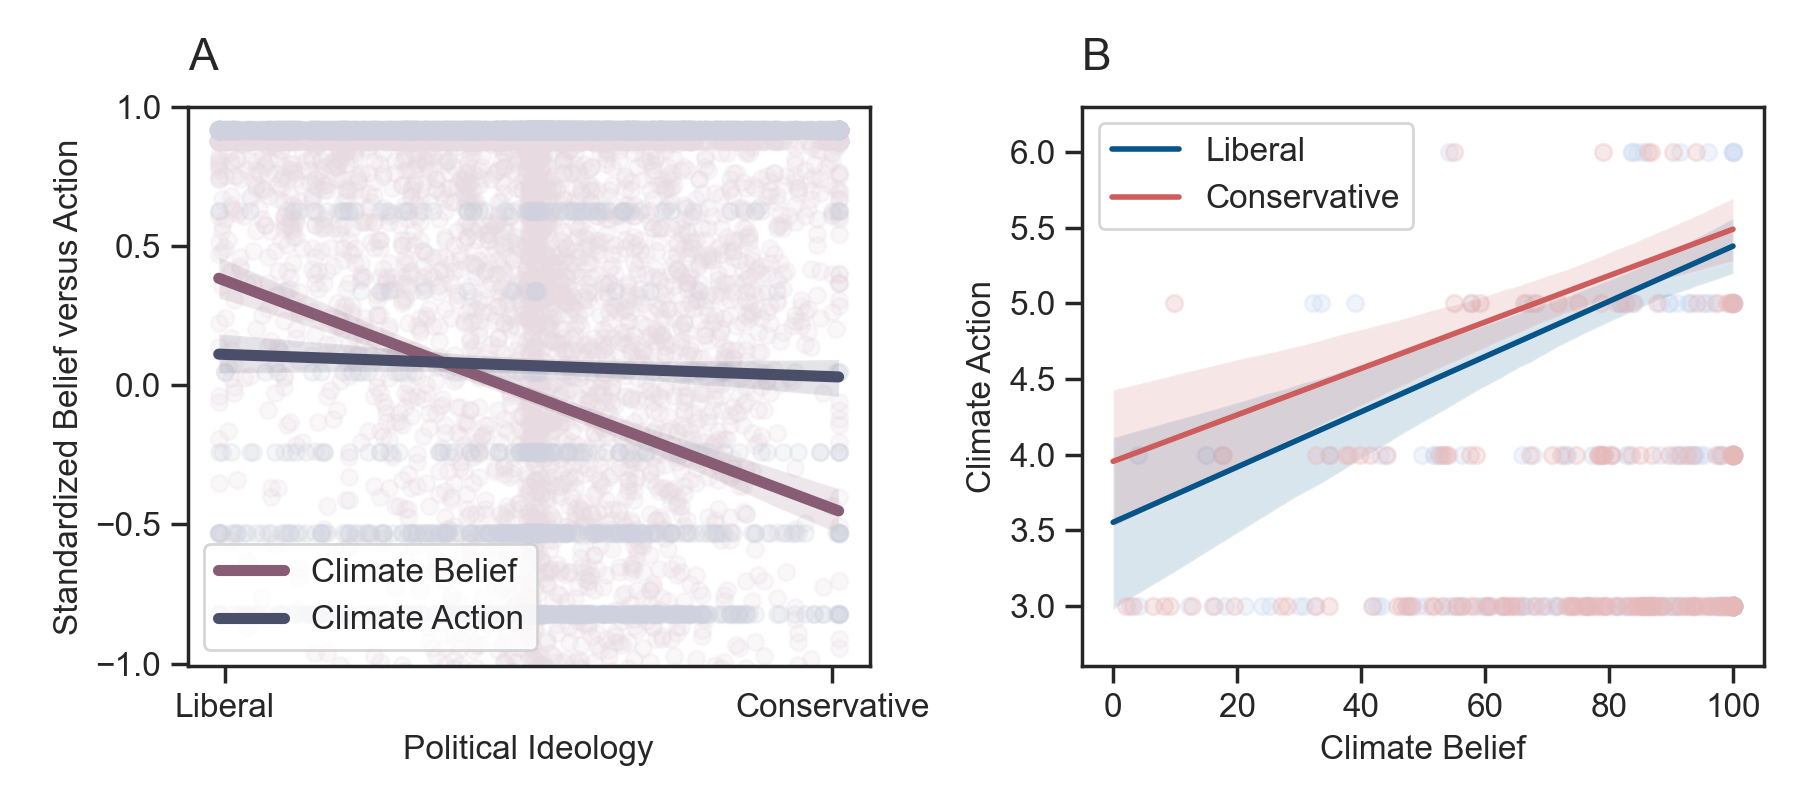

In [79]:
fig, ax = plt.subplots(1,2, figsize=(9,4))

sns.regplot(x=df_z_control.query("Type == 'BELIEFcc'")['ide'], y=df_z_control.query("Type == 'BELIEFcc'")['score'], scatter_kws={"color": "#E7DAE1","alpha":.2}, \
            line_kws={"color":"#875C74", "linewidth": 4, "label": "Climate Belief"}, ax=ax[0])
sns.regplot(x=df_z_control.query("Type == 'WEPTcc'")['ide'], y=df_z_control.query("Type == 'WEPTcc'")['score'],  scatter_kws={"color": "#CFD2DE","alpha":.2}, \
            line_kws={"color":"#4A4E69", "linewidth": 4, "label": "Climate Action"}, ax=ax[0])

sns.regplot(x=df_control.query("Ideology == 'Liberal'")['BELIEFcc'], y=df_control.query("Ideology == 'Liberal'")['WEPTcc'], scatter_kws={"color": "#CDDCF3","alpha":.3}, \
            line_kws={"color":"#065488","alpha":1,"lw":2, "label": "Liberal"}, ax=ax[1])
sns.regplot(x=df_control.query("Ideology == 'Conservative'")['BELIEFcc'], y=df_control.query("Ideology == 'Conservative'")['WEPTcc'],  scatter_kws={"color": "#E9B9B9","alpha":.3}, \
            line_kws={"color":"#CD5C5C","alpha":1,"lw":2, "label": "Conservative"}, ax=ax[1])

ax[0].set_xlabel('Political Ideology')
ax[0].set_ylim([-1.01,1])
ax[0].set_ylabel('Standardized Belief versus Action')
ax[0].set_xticks([1, 99])
ax[0].set_xticklabels(['Liberal', 'Conservative'])
ax[0].legend()
ax[1].legend()

ax[1].set_ylabel('Climate Action')
ax[1].set_xlabel('Climate Belief')
ax[1].set_ylim(2.6,6.3)

bff.panellabel(ax[0], "A")
bff.panellabel(ax[1], "B")

plt.tight_layout()
plt.savefig('Fig3.pdf', dpi=500, format="pdf")

# Figure 3

/tmp/ipykernel_69115/3236291593.py:26: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


<IPython.core.display.Javascript object>


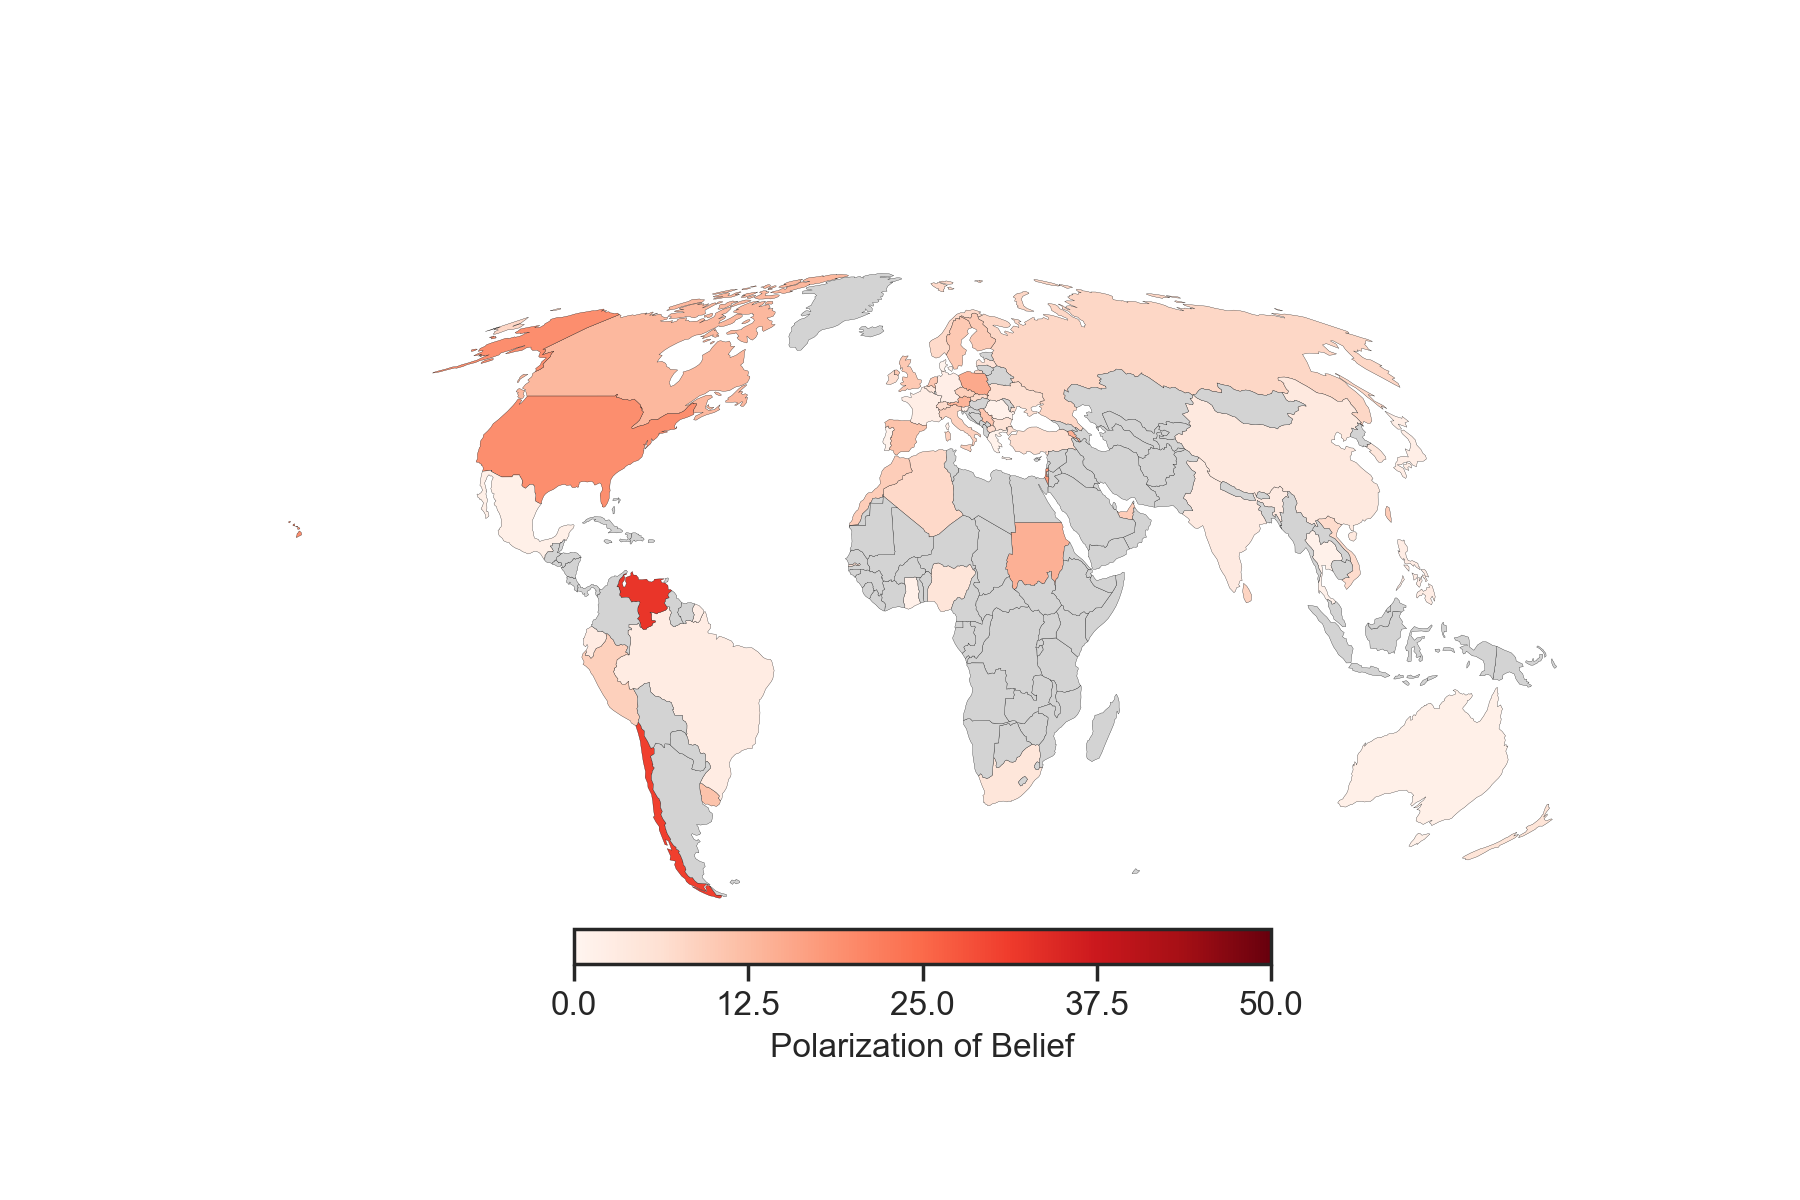

In [91]:
# Iterate over sub-dataframes of each Country
records = []
for groupid, group in df_control.groupby("Country"):
    # Collect sample size, mean, and var for each Ideology
    n, mean, var = [], [], []
    # Drop NaN ideology and sort by ideology; Conservative will always come FIRST
    group = group.dropna(subset=["Ideology"]).sort_values(by="Ideology")
    if group.shape[0] == 0:
        continue # Some countries are all-NaN Ideology
    for subgroupid, subgroup in group.groupby("Ideology"):
        n.append(subgroup.shape[0])
        mean.append(subgroup["BELIEFcc"].mean())
        var.append(subgroup["BELIEFcc"].var())
    if len(n) == 2:
        # https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_confidence_intervals/bs704_confidence_intervals5.html
        dof = sum(n)-2
        t = stats.t.ppf(.975, dof)
        ci = t * np.sqrt(((n[1]-1)*var[1] + (n[0]-1)*var[0]) / dof) * np.sqrt(1/n[1] + 1/n[0])
        records.append({"Country": groupid, "BELIEFcc": mean[1]-mean[0], "err": ci})
dfdiff = pd.DataFrame.from_records(records).sort_values(by="BELIEFcc", ascending=False)

import matplotlib.pyplot as plt
from cartopy import crs as ccrs
import geopandas

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[(world.pop_est > 0) & (world.name != "Antarctica")]
world = world.to_crs(ccrs.Mollweide().proj4_init)
world = world.cx[world.bounds.minx.min()*.8:world.bounds.maxx.max()*.8, world.bounds.miny.min():world.bounds.maxy.max()]

strip_excess = np.vectorize(lambda x: x[2:-1])
dfdiff.replace({'Russian Federation':'Russia',
                'Unitedarabemirates':'United Arab Emirates',
                'Uk':'United Kingdom',
                'Southkorea':'South Korea',
                'Northmacedonia':'North Macedonia',
                'Southafrica':'South Africa',
                'Srilanka': 'Sri Lanka',
                'Newzealand': 'New Zealand',
                'Usa': 'United States of America'}, inplace=True)
dfdiff["name"] = dfdiff["Country"]
dfdiff["absdifference"] = dfdiff["BELIEFcc"].abs()

data_world = pd.merge(world, dfdiff, left_on='name', right_on='name', how='left')
data_world = data_world.to_crs(ccrs.Mollweide())

fig, ax = plt.subplots(1, 1, figsize=(9,6))

temp = data_world.plot(
    ax=ax,
    column="absdifference",
    legend=True,
    legend_kwds={'label': "Polarization of Belief",
                 'shrink': 0.5,  
                 'aspect': 20,
                 'location': 'bottom',
                #  'ticks': np.linspace(data_world.BELIEFcc.min(), data_world.BELIEFcc.max(), 5),
                 'ticks': np.linspace(0, 50, 5),
                 'pad': 0.
    },
    missing_kwds={
        "color": "lightgrey",
        "label": "Missing values",
    },
    vmin=0,
    vmax=50,
    cmap='Reds',
    edgecolor='black',
    linewidth=0.1
)
temp.set_axis_off()
# temp.legend(fontsize=30)
plt.savefig('map_polarization_belief.png', dpi = 500)

# Fig 3B

/tmp/ipykernel_69115/1018654420.py:24: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


<IPython.core.display.Javascript object>


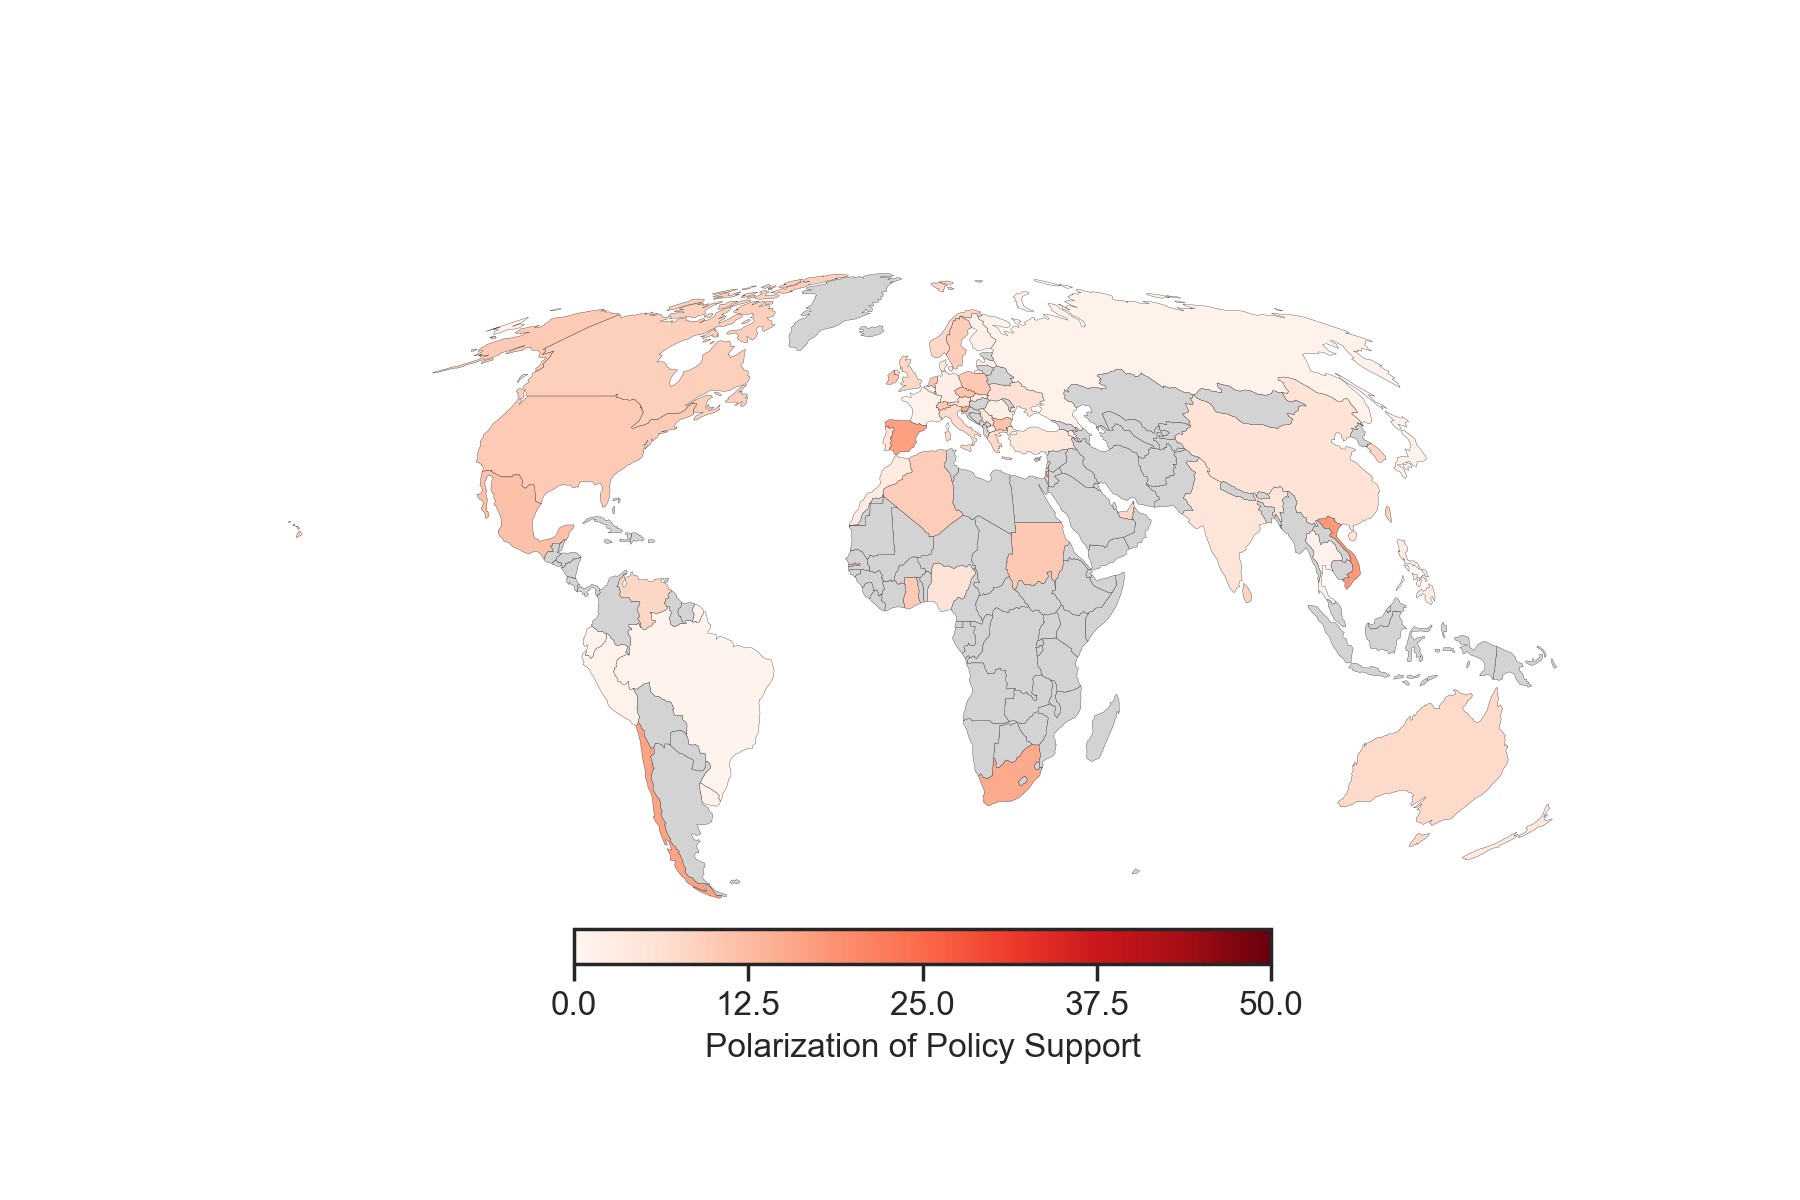

In [92]:
# Iterate over sub-dataframes of each Country
records = []
for groupid, group in df_control.groupby("Country"):
    # Collect sample size, mean, and var for each Ideology
    n, mean, var = [], [], []
    # Drop NaN ideology and sort by ideology; Conservative will always come FIRST
    group = group.dropna(subset=["Ideology"]).sort_values(by="Ideology")
    if group.shape[0] == 0:
        continue # Some countries are all-NaN Ideology
    for subgroupid, subgroup in group.groupby("Ideology"):
        n.append(subgroup.shape[0])
        mean.append(subgroup["POLICYcc"].mean())
        var.append(subgroup["POLICYcc"].var())
    if len(n) == 2:
        dof = sum(n)-2
        t = stats.t.ppf(.975, dof)
        ci = t * np.sqrt(((n[1]-1)*var[1] + (n[0]-1)*var[0]) / dof) * np.sqrt(1/n[1] + 1/n[0])
        records.append({"Country": groupid, "POLICYcc": mean[1]-mean[0], "err": ci})
dfdiff = pd.DataFrame.from_records(records).sort_values(by="POLICYcc", ascending=False)

import matplotlib.pyplot as plt
from cartopy import crs as ccrs
import geopandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[(world.pop_est > 0) & (world.name != "Antarctica")]
world = world.to_crs(ccrs.Mollweide().proj4_init)
world = world.cx[world.bounds.minx.min()*.8:world.bounds.maxx.max()*.8, world.bounds.miny.min():world.bounds.maxy.max()]
strip_excess = np.vectorize(lambda x: x[2:-1])
dfdiff.replace({'Russian Federation':'Russia',
                'Unitedarabemirates':'United Arab Emirates',
                'Uk':'United Kingdom',
                'Southkorea':'South Korea',
                'Northmacedonia':'North Macedonia',
                'Southafrica':'South Africa',
                'Srilanka': 'Sri Lanka',
                'Newzealand': 'New Zealand',
                'Usa': 'United States of America'}, inplace=True)
dfdiff["name"] = dfdiff["Country"]
dfdiff["absdifference"] = dfdiff["POLICYcc"].abs()
data_world = pd.merge(world, dfdiff, left_on='name', right_on='name', how='left')
data_world = data_world.to_crs(ccrs.Mollweide())
fig, ax = plt.subplots(1, 1, figsize=(9,6))
temp = data_world.plot(
    ax=ax,
    column="absdifference",
    legend=True,
    legend_kwds={'label': "Polarization of Policy Support",
                 'shrink': 0.5,  
                 'aspect': 20,
                 'location': 'bottom',
                 'ticks': np.linspace(0., 50, 5),
                 'pad': 0.},
    missing_kwds={
        "color": "lightgrey",
        "label": "Missing values",
    },
    vmin=0.,
    vmax=50,
    cmap='Reds',
    edgecolor='black',
    linewidth=0.1,
)
temp.set_axis_off()
plt.savefig('map_polarization_policy.png', dpi = 500)

# Fig 3C

/tmp/ipykernel_69115/947428310.py:24: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


<IPython.core.display.Javascript object>


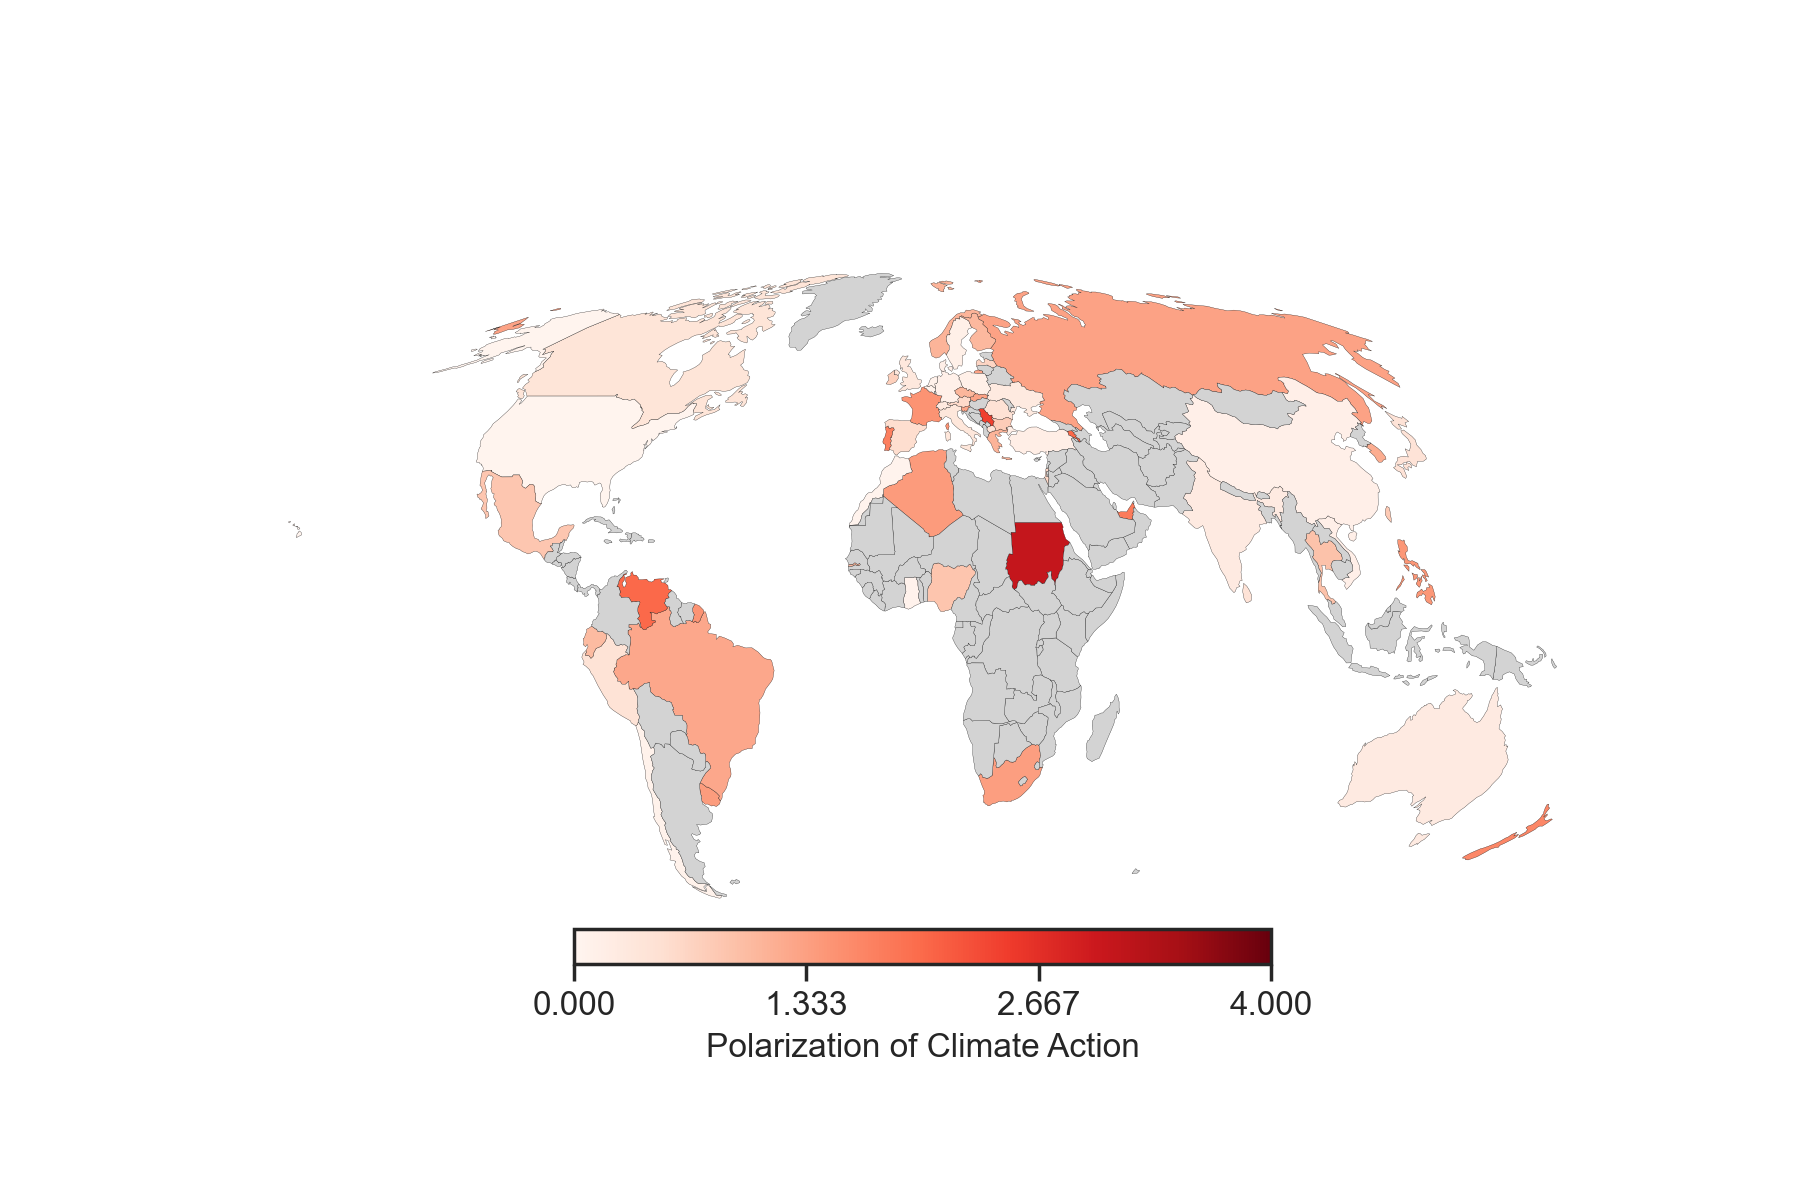

In [93]:
# Iterate over sub-dataframes of each Country
records = []
for groupid, group in df_control.groupby("Country"):
    # Collect sample size, mean, and var for each Ideology
    n, mean, var = [], [], []
    # Drop NaN ideology and sort by ideology; Conservative will always come FIRST
    group = group.dropna(subset=["Ideology"]).sort_values(by="Ideology")
    if group.shape[0] == 0:
        continue # Some countries are all-NaN Ideology
    for subgroupid, subgroup in group.groupby("Ideology"):
        n.append(subgroup.shape[0])
        mean.append(subgroup["WEPTcc"].mean())
        var.append(subgroup["WEPTcc"].var())
    if len(n) == 2:
        dof = sum(n)-2
        t = stats.t.ppf(.975, dof)
        ci = t * np.sqrt(((n[1]-1)*var[1] + (n[0]-1)*var[0]) / dof) * np.sqrt(1/n[1] + 1/n[0])
        records.append({"Country": groupid, "WEPTcc": mean[1]-mean[0], "err": ci})
dfdiff = pd.DataFrame.from_records(records).sort_values(by="WEPTcc", ascending=False)

import matplotlib.pyplot as plt
from cartopy import crs as ccrs
import geopandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[(world.pop_est > 0) & (world.name != "Antarctica")]
world = world.to_crs(ccrs.Mollweide().proj4_init)
world = world.cx[world.bounds.minx.min()*.8:world.bounds.maxx.max()*.8, world.bounds.miny.min():world.bounds.maxy.max()]
strip_excess = np.vectorize(lambda x: x[2:-1])
dfdiff.replace({'Russian Federation':'Russia',
                'Unitedarabemirates':'United Arab Emirates',
                'Uk':'United Kingdom',
                'Southkorea':'South Korea',
                'Northmacedonia':'North Macedonia',
                'Southafrica':'South Africa',
                'Srilanka': 'Sri Lanka',
                'Newzealand': 'New Zealand',
                'Usa': 'United States of America'}, inplace=True)
dfdiff["name"] = dfdiff["Country"]
dfdiff["absdifference"] = dfdiff["WEPTcc"].abs()
data_world = pd.merge(world, dfdiff, left_on='name', right_on='name', how='left')
data_world = data_world.to_crs(ccrs.Mollweide())
fig, ax = plt.subplots(1, 1, figsize=(9,6))
temp = data_world.plot(
    ax=ax,
    column="absdifference",
    legend=True,
    legend_kwds={'label': "Polarization of Climate Action",
                 'shrink': 0.5,  
                 'aspect': 20,
                 'location': 'bottom',
                 'ticks': np.linspace(0., 4, 4),
                 'pad': 0.},
    missing_kwds={
        "color": "lightgrey",
        "label": "Missing values",
    },
    vmin=0.,
    vmax=4,
    cmap='Reds',
    edgecolor='black',
    linewidth=0.1,
)
temp.set_axis_off()
plt.savefig('map_polarization_action.png', dpi = 500)

# FIGURE 4

<IPython.core.display.Javascript object>


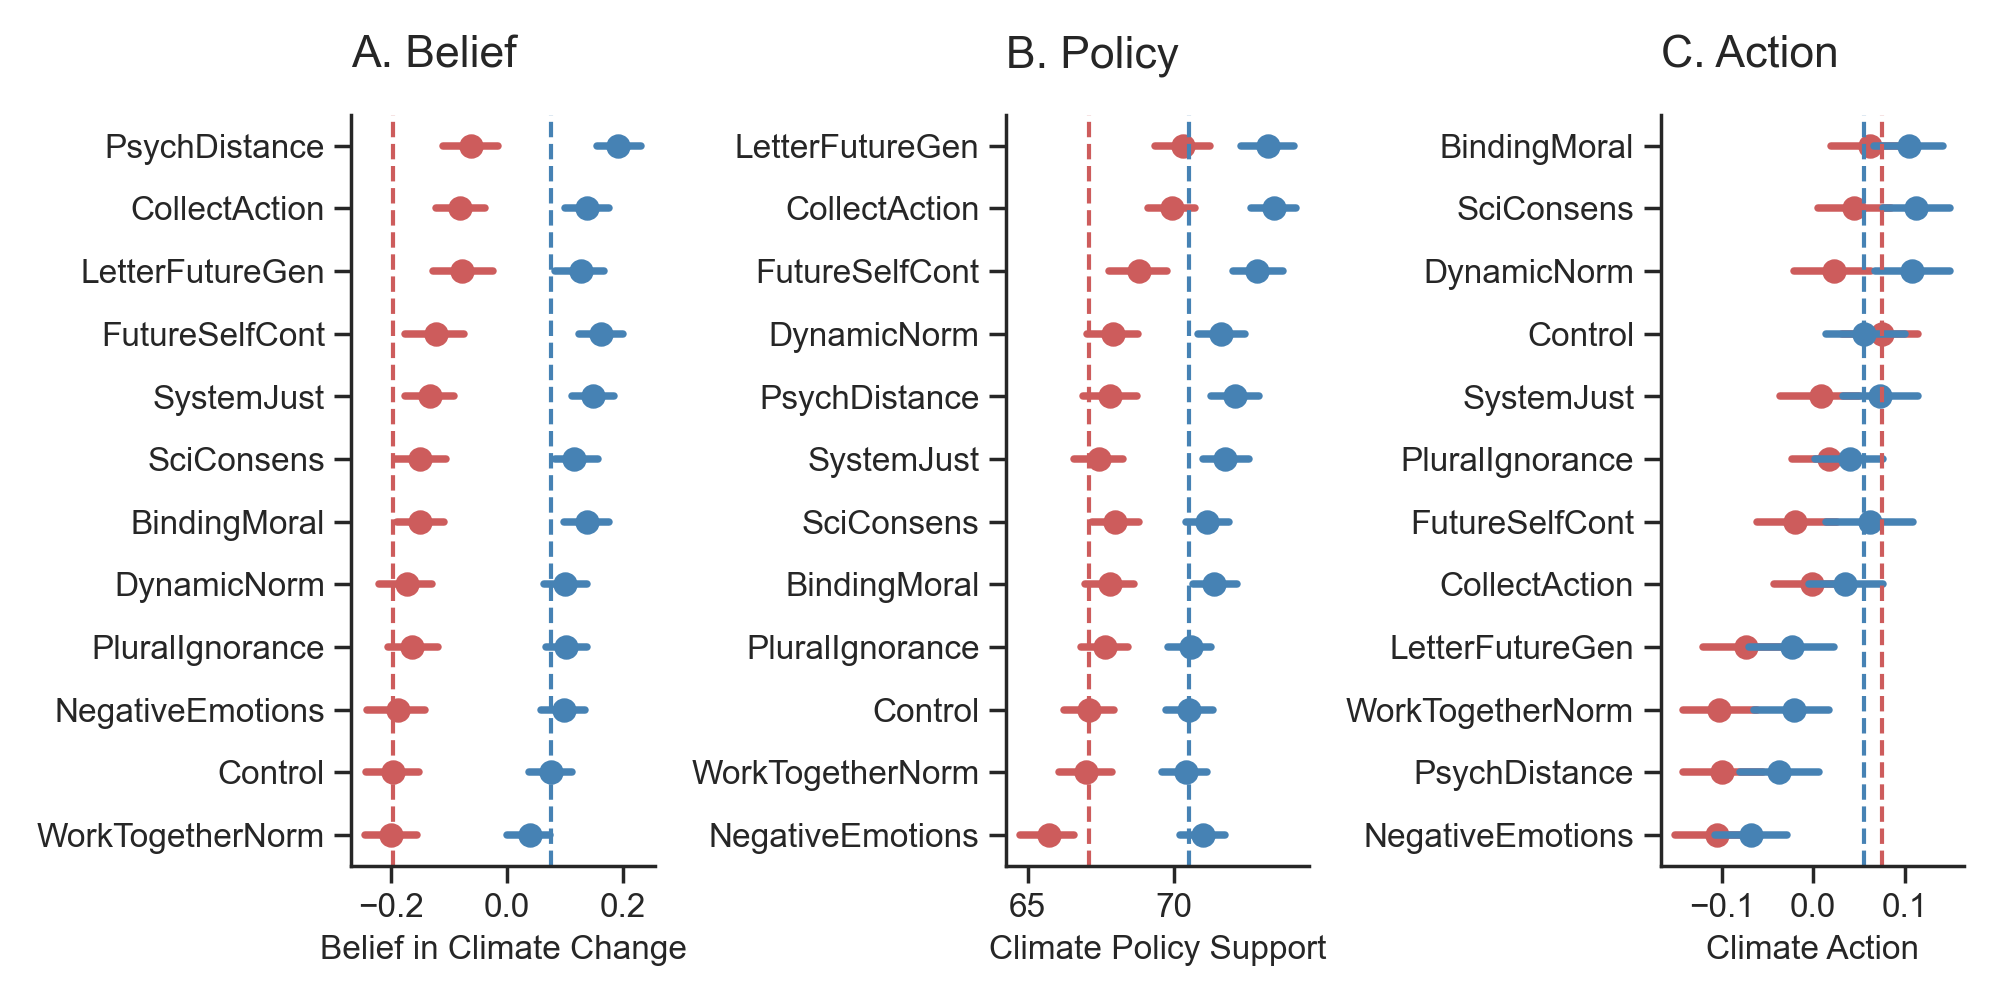

/tmp/ipykernel_69115/2095327111.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order1 = df.groupby("condName").agg("mean")["BELIEFcc"].sort_values(ascending=False).index
/tmp/ipykernel_69115/2095327111.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order2 = df.groupby("condName").agg("mean")["POLICYcc"].sort_values(ascending=False).index
/tmp/ipykernel_69115/2095327111.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for th

In [103]:
pal = ["#CD5C5C", '#4682B4']
fig, ax = plt.subplots(1,3, figsize=(10,5))

order1 = df.groupby("condName").agg("mean")["BELIEFcc"].sort_values(ascending=False).index
sns.pointplot(y=df.condName, x=df.BELIEFcc,  hue=df.Ideology, data=df, orient="h", \
            palette=pal, join=False, \
            order= order1, ax=ax[0])

order2 = df.groupby("condName").agg("mean")["POLICYcc"].sort_values(ascending=False).index
sns.pointplot(y=df.condName, x=df.POLICYcc,  hue=df.Ideology, data=df, orient="h", \
            palette=pal, join=False, \
            order= order2, ax=ax[1])

order3 = df.groupby("condName").agg("mean")["WEPTcc"].sort_values(ascending=False).index
sns.pointplot(y=df.condName, x=df.WEPTcc,  hue=df.Ideology, data=df, orient="h", \
            palette=pal, join=False, \
            order= order3, ax=ax[2])
ax[0].set_ylabel("")
ax[0].set_xlabel("Belief in Climate Change")

ax[1].set_ylabel("")
ax[1].set_xlabel("Climate Policy Support")

ax[2].set_ylabel("")
ax[2].set_xlabel("Climate Action")

ax[0].get_legend().remove()
ax[1].get_legend().remove()
ax[2].get_legend().remove()
bff.panellabel(ax[0], "A. Belief")
bff.panellabel(ax[1], "B. Policy")
bff.panellabel(ax[2], "C. Action")

ax[0].axvline(x = df.query("condName=='Control' & Ideology=='Liberal'")["BELIEFcc"].mean(),  color='#4682B4', ls='--')
ax[0].axvline(x = df.query("condName=='Control' & Ideology=='Conservative'")["BELIEFcc"].mean(),  color='#CD5C5C', ls='--')

ax[1].axvline(x = df.query("condName=='Control' & Ideology=='Liberal'")["POLICYcc"].mean(),  color='#4682B4', ls='--')
ax[1].axvline(x = df.query("condName=='Control' & Ideology=='Conservative'")["POLICYcc"].mean(),  color='#CD5C5C', ls='--')

ax[2].axvline(x = df.query("condName=='Control' & Ideology=='Liberal'")["WEPTcc"].mean(),  color='#4682B4', ls='--')
ax[2].axvline(x = df.query("condName=='Control' & Ideology=='Conservative'")["WEPTcc"].mean(),  color='#CD5C5C', ls='--')

sns.despine()
plt.tight_layout()
plt.savefig('Fig4.pdf', dpi=900, format="pdf")